In [ ]:
import pandas as pd
from glob2 import glob
import numpy as np
import datetime
import time
path = pd.DataFrame(glob('C:\\Users\\admin\\Desktop\\sdk\\powertechfund\\data\\**'),columns=['location'])
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

intraday_trade_log = pd.DataFrame(columns=['Entry_Datetime','Underlying_Traded_Price','ATM','CE_Entry_Price','CE_Exit_Price','CE_Exit_Datetime','PE_Entry_Price','PE_Exit_Price','PE_Exit_Datetime','CE_Upper_Hedge_Entry_Price','CE_Upper_Hedge_Exit_Price','CE_Upper_Hedge_Exit_Datetime','PE_Below_Hedge_Entry_Price','PE_Below_Hedge_Exit_Price','PE_Below_Hedge_Exit_Datetime','PnL'])

for index,row in path.iterrows():
    df = pd.read_csv(row['location'], low_memory=False)
    df.columns = ['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
           'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
           'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME',
           'C_LAST', 'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK',
           'P_SIZE', 'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA',
           'P_RHO', 'P_IV', 'P_VOLUME', 'STRIKE_DISTANCE',
           'STRIKE_DISTANCE_PCT']

    # df_data = df[['QUOTE_READTIME','QUOTE_DATE','UNDERLYING_LAST','EXPIRE_DATE','C_BID','C_ASK','STRIKE','P_BID','P_ASK']]
    # df_data = df_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    # df_data['QUOTE_READTIME'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))
    # df_data['QUOTE_DATE'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date())
    # df_data['EXPIRE_DATE'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date())
    # df_data.loc[df_data['C_BID'] == '', 'C_BID'] = '0.0'
    # df_data.loc[df_data['C_ASK'] == '', 'C_ASK'] = '0.0'
    # df_data.loc[df_data['P_BID'] == '', 'P_BID'] = '0.0'
    # df_data.loc[df_data['P_ASK'] == '', 'P_ASK'] = '0.0'
    # df_data['C_BID'] = df_data['C_BID'].apply(lambda x : float(x))
    # df_data['C_ASK'] = df_data['C_ASK'].apply(lambda x : float(x))
    # df_data['P_BID'] = df_data['P_BID'].apply(lambda x : float(x))
    # df_data['P_ASK'] = df_data['P_ASK'].apply(lambda x : float(x))
    # df_data['C_LTP'] = (df_data['C_BID']+ df_data['C_ASK']) /2
    # df_data['P_LTP'] = (df_data['P_BID']+ df_data['P_ASK']) /2
    # date_list = df_data['QUOTE_DATE'].unique()
    
#########################################################################################################################################

    
    df_data = df[['QUOTE_READTIME','QUOTE_DATE','UNDERLYING_LAST','EXPIRE_DATE','C_BID','C_ASK','STRIKE','P_BID','P_ASK']]
    # Remove leading and trailing whitespaces
    df_data = df_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    # Convert 'QUOTE_READTIME' to datetime
    df_data['QUOTE_READTIME'] = pd.to_datetime(df_data['QUOTE_READTIME'], format='%Y-%m-%d %H:%M')
    
    # Convert 'QUOTE_DATE' to date
    df_data['QUOTE_DATE'] = pd.to_datetime(df_data['QUOTE_DATE'], format='%Y-%m-%d')
    
    # Convert 'EXPIRE_DATE' to date
    df_data['EXPIRE_DATE'] = pd.to_datetime(df_data['EXPIRE_DATE'], format='%Y-%m-%d')
    
    # Replace empty strings with '0.0' and convert to float
    df_data['C_BID'] = pd.to_numeric(df_data['C_BID'].replace('', '0.0'))
    df_data['C_ASK'] = pd.to_numeric(df_data['C_ASK'].replace('', '0.0'))
    df_data['P_BID'] = pd.to_numeric(df_data['P_BID'].replace('', '0.0'))
    df_data['P_ASK'] = pd.to_numeric(df_data['P_ASK'].replace('', '0.0'))

    df_data['C_LTP'] = (df_data['C_BID']+ df_data['C_ASK']) /2
    df_data['P_LTP'] = (df_data['P_BID']+ df_data['P_ASK']) /2
    date_list = df_data['QUOTE_DATE'].unique()

#############################################################################################################################################


    # # Assuming df_data is your DataFrame
    # df_data = df[['QUOTE_READTIME','QUOTE_DATE','UNDERLYING_LAST','EXPIRE_DATE','C_BID','C_ASK','STRIKE','P_BID','P_ASK']]
    # # Remove leading and trailing whitespaces
    # df_data = df_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    # # Convert 'QUOTE_READTIME' to datetime
    # df_data['QUOTE_READTIME'] = df_data['QUOTE_READTIME'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))
    
    # # Convert 'QUOTE_DATE' to date
    # df_data['QUOTE_DATE'] = df_data['QUOTE_DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
    
    # # Convert 'EXPIRE_DATE' to date
    # df_data['EXPIRE_DATE'] = df_data['EXPIRE_DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
    
    # # Replace empty strings with '0.0' and convert to float
    # df_data['C_BID'] = df_data['C_BID'].apply(lambda x: float(x) if x != '' else 0.0)
    # df_data['C_ASK'] = df_data['C_ASK'].apply(lambda x: float(x) if x != '' else 0.0)
    # df_data['P_BID'] = df_data['P_BID'].apply(lambda x: float(x) if x != '' else 0.0)
    # df_data['P_ASK'] = df_data['P_ASK'].apply(lambda x: float(x) if x != '' else 0.0)
    # df_data['C_LTP'] = (df_data['C_BID']+ df_data['C_ASK']) /2
    # df_data['P_LTP'] = (df_data['P_BID']+ df_data['P_ASK']) /2

    # date_list = df_data['QUOTE_DATE'].unique()
    for dts in date_list:
        try:
            #print(dts)
            intraday_data = df_data[(df_data['QUOTE_DATE']==dts) ]#& (intraday_data['STRIKE'] == atm)    
            #print(intraday_data)
                
            # entry_time = datetime.datetime.combine(intraday_data['QUOTE_DATE'][0].date(), datetime.time(9, 45))
            # exit_time = datetime.datetime.combine(intraday_data['QUOTE_DATE'][0].date(), datetime.time(15, 30))
            entry_time = datetime.datetime.combine(intraday_data['QUOTE_DATE'].iloc[0].date(), datetime.time(9, 45))
            exit_time = datetime.datetime.combine(intraday_data['QUOTE_DATE'].iloc[0].date(), datetime.time(15, 30))
    
#entry_time = datetime.datetime.combine(datetime.datetime.today().date(), datetime.time(9, 45))
#exit_time = datetime.datetime.combine(datetime.datetime.today().date(), datetime.time(15, 30))
            while entry_time < exit_time:
                print(f"entry_time {entry_time}")
                
   # time.sleep(0.05)
                atm = intraday_data[intraday_data['QUOTE_READTIME'] == entry_time]['UNDERLYING_LAST'].iloc[0]
                base = 10
                atm = base*round(atm/base)
        
                # otm = (atm * 0.05 ) + atm
                # otm = base*round(otm/base)   
                # itm = atm - (atm * 0.05 ) 
                # itm = base*round(itm/base)
                otm = atm + 20
                itm = atm - 20
        
                atm_intraday_data = intraday_data[(intraday_data['STRIKE'] == atm)]#(intraday_data['QUOTE_DATE']==" 2022-06-02") &
                atm_intraday_data.reset_index(drop=True,inplace=True)
        
                upper_hedge_intraday_data = intraday_data[(intraday_data['STRIKE'] == otm)]#(intraday_data['QUOTE_DATE']==" 2022-06-02") &
                upper_hedge_intraday_data.reset_index(drop=True,inplace=True)
        
                lower_hedge_intraday_data = intraday_data[(intraday_data['STRIKE'] == itm)]#(intraday_data['QUOTE_DATE']==" 2022-06-02") &
                lower_hedge_intraday_data.reset_index(drop=True,inplace=True)
        
                atm_intraday_data = atm_intraday_data[['QUOTE_READTIME','UNDERLYING_LAST','C_LTP','P_LTP']].set_index('QUOTE_READTIME')#['QUOTE_READTIME','QUOTE_DATE','UNDERLYING_LAST','EXPIRE_DATE','STRIKE','C_LTP','P_LTP']
                upper_hedge_intraday_data = upper_hedge_intraday_data[['QUOTE_READTIME','C_LTP']].set_index('QUOTE_READTIME')
                lower_hedge_intraday_data = lower_hedge_intraday_data[['QUOTE_READTIME','P_LTP']].set_index('QUOTE_READTIME')
        
                final_intraday_data = pd.concat([atm_intraday_data,upper_hedge_intraday_data,upper_hedge_intraday_data],axis=1)
                final_intraday_data.columns = ['UNDERLYING_LTP','ATM_C_LTP','ATM_P_LTP','UPPER_C_LTP','LOWER_P_LTP']
                final_intraday_data = final_intraday_data.ffill()
                final_intraday_data.reset_index(inplace=True)
        
                traded_prices = final_intraday_data[final_intraday_data['QUOTE_READTIME'] == entry_time]
                    
                underlying_entry_price = traded_prices['UNDERLYING_LTP'].iloc[0]
                atm_ce_entry_price = traded_prices['ATM_C_LTP'].iloc[0]
                atm_pe_entry_price = traded_prices['ATM_P_LTP'].iloc[0]
                upper_ce_entry_price = traded_prices['UPPER_C_LTP'].iloc[0]
                lower_pe_entry_price = traded_prices['LOWER_P_LTP'].iloc[0]
        
                stoploss_percent = 30/100
                combi_prem = atm_ce_entry_price + atm_pe_entry_price
                combi_sl = combi_prem + (combi_prem *stoploss_percent )
        
                tg_percent = 30/100
                combi_tg = combi_prem - (combi_prem *tg_percent )
        
                entry_time_index = final_intraday_data[final_intraday_data['QUOTE_READTIME'] == entry_time].index[0]
                exit_time_index = final_intraday_data[final_intraday_data['QUOTE_READTIME'] == exit_time].index[0]
        
                final_intraday_data =final_intraday_data[entry_time_index:exit_time_index+1]
        
                final_intraday_data['ce_pnl'] = 0
                final_intraday_data['pe_pnl'] = 0
                final_intraday_data['upper_ce_pnl'] = 0
                final_intraday_data['lower_pe_pnl'] = 0
                final_intraday_data['total_pnl'] = 0
                final_intraday_data.reset_index(drop=True,inplace=True)
        
                stoploss_counter = 0
                tg_counter = 0
                ce_exit_datetime = ''
                pe_exit_datetime = ''
                ce_upper_hedge_exit_datetime = ''
                pe_below_hedge_exit_datetime = ''
                ce_exit_price= 0
                pe_exit_price= 0
                ce_upper_exit_price= 0
                pe_below_exit_price= 0
                ce_pnl = 0
                pe_pnl = 0
                ce_upper_hedge_pnl = 0
                pe_below_hedge_pnl = 0
                pnl = 0
                
                for index,row in final_intraday_data.iterrows():
                    ce_ltp = row['ATM_C_LTP']
                    pe_ltp = row['ATM_P_LTP']
                    combi_premium = ce_ltp + pe_ltp
                    ce_upper_hedge_ltp = row['UPPER_C_LTP']
                    pe_below_hedge_ltp = row['LOWER_P_LTP']
                    
                    if (stoploss_counter == 0) & (tg_counter == 0) & (row['QUOTE_READTIME'] == exit_time):
                        print('Checking condition for 03:20 time limit')
                        ce_pnl = atm_ce_entry_price - ce_ltp
                        pe_pnl = atm_pe_entry_price - pe_ltp
                        ce_upper_hedge_pnl = upper_ce_entry_price - ce_upper_hedge_ltp
                        pe_below_hedge_pnl = lower_pe_entry_price - pe_below_hedge_ltp
                        pnl = ce_pnl + pe_pnl + ce_upper_hedge_pnl + pe_below_hedge_pnl
                        
                        stoploss_counter =1
                        tg_counter =1
                            
                        ce_exit_datetime = row['QUOTE_READTIME']
                        pe_exit_datetime = row['QUOTE_READTIME']
                        ce_upper_exit_datetime= row['QUOTE_READTIME']
                        pe_below_exit_datetime= row['QUOTE_READTIME']
                
                        ce_exit_price = ce_ltp
                        pe_exit_price = pe_ltp
                        ce_upper_exit_price = ce_upper_hedge_ltp
                        pe_below_exit_price = pe_below_hedge_ltp
                
                        final_intraday_data.loc[index,'ce_pnl'] = ce_pnl
                        final_intraday_data.loc[index,'pe_pnl'] = pe_pnl
                        final_intraday_data.loc[index,'upper_ce_pnl'] = ce_upper_hedge_pnl
                        final_intraday_data.loc[index,'lower_pe_pnl'] = pe_below_hedge_pnl        
                        print('Exited at 03:20 condition')
                        
                        break
                    #Condition for Stop Loss
                    elif (combi_premium >= combi_sl) & (stoploss_counter == 0) & (tg_counter == 0):
                        print('Checking condition  for Stop Loss')
                        ce_pnl = atm_ce_entry_price - ce_ltp
                        pe_pnl = atm_pe_entry_price - pe_ltp
                        ce_upper_hedge_pnl = upper_ce_entry_price - ce_upper_hedge_ltp
                        pe_below_hedge_pnl = lower_pe_entry_price - pe_below_hedge_ltp
                        pnl = ce_pnl + pe_pnl + ce_upper_hedge_pnl + pe_below_hedge_pnl
                
                        stoploss_counter = 1
                
                        ce_exit_datetime = row['QUOTE_READTIME']
                        pe_exit_datetime = row['QUOTE_READTIME']
                        ce_upper_exit_datetime= row['QUOTE_READTIME']
                        pe_below_exit_datetime= row['QUOTE_READTIME']
                        
                        ce_exit_price = ce_ltp
                        pe_exit_price = pe_ltp
                        ce_upper_exit_price = ce_upper_hedge_ltp
                        pe_below_exit_price = pe_below_hedge_ltp
                            
                        final_intraday_data.loc[index,'ce_pnl'] = ce_pnl
                        final_intraday_data.loc[index,'pe_pnl'] = pe_pnl
                        final_intraday_data.loc[index,'upper_ce_pnl'] = ce_upper_hedge_pnl
                        final_intraday_data.loc[index,'lower_pe_pnl'] = pe_below_hedge_pnl     
                        print('Stop loss of 30% got hit')
                        break
                
                    elif ( combi_premium <= combi_tg) & (stoploss_counter == 0) & (tg_counter == 0):
                        print('Checking condition for Target')
                        ce_pnl = atm_ce_entry_price - ce_ltp
                        pe_pnl = atm_pe_entry_price - pe_ltp
                        ce_upper_hedge_pnl = upper_ce_entry_price - ce_upper_hedge_ltp
                        pe_below_hedge_pnl = lower_pe_entry_price - pe_below_hedge_ltp
                        pnl = ce_pnl + pe_pnl + ce_upper_hedge_pnl + pe_below_hedge_pnl
                 
                        tg_counter = 1
                 
                        ce_exit_datetime = row['QUOTE_READTIME']
                        pe_exit_datetime = row['QUOTE_READTIME']
                        ce_upper_exit_datetime= row['QUOTE_READTIME']
                        pe_below_exit_datetime= row['QUOTE_READTIME']
                        
                        ce_exit_price = ce_ltp
                        pe_exit_price = pe_ltp
                        ce_upper_exit_price = ce_upper_hedge_ltp
                        pe_below_exit_price = pe_below_hedge_ltp
                 
                        final_intraday_data.loc[index,'ce_pnl'] = ce_pnl
                        final_intraday_data.loc[index,'pe_pnl'] = pe_pnl
                        final_intraday_data.loc[index,'upper_ce_pnl'] = ce_upper_hedge_pnl
                        final_intraday_data.loc[index,'lower_pe_pnl'] = pe_below_hedge_pnl  
                            
                        print('Target of 80% got achived')
                        break
                                    
                new_row = pd.DataFrame({'Entry_Datetime': [entry_time],
                                                    'Underlying_Traded_Price': [underlying_entry_price],
                                                    'ATM': [atm],
                                                    'CE_Entry_Price': [atm_ce_entry_price],
                                                    'CE_Exit_Price': [ce_exit_price],
                                                    'CE_Exit_Datetime': [ce_exit_datetime],
                                                    'PE_Entry_Price': [atm_pe_entry_price],
                                                    'PE_Exit_Price': [pe_exit_price],
                                                    'PE_Exit_Datetime': [pe_exit_datetime],
                                                    'CE_Upper_Hedge_Entry_Price':[upper_ce_entry_price],
                                                    'CE_Upper_Hedge_Exit_Price':[ce_upper_exit_price],
                                                    'CE_Upper_Hedge_Exit_Datetime':[ce_upper_exit_datetime],
                                                    'PE_Below_Hedge_Entry_Price':[lower_pe_entry_price],
                                                    'PE_Below_Hedge_Exit_Price':[pe_below_exit_price],
                                                    'PE_Below_Hedge_Exit_Datetime':[pe_below_exit_datetime],
                                                    'PnL': [pnl]})
                
                
                
                # Concatenate the new row DataFrame with intraday_trade_log
                #intraday_trade_log = pd.concat([intraday_trade_log, new_row], ignore_index=True)
                intraday_trade_log = pd.concat([intraday_trade_log, new_row], ignore_index=True)
                entry_time = entry_time + datetime.timedelta(minutes = 15)
        except Exception as e:
            print(dts)
            print(e)

In [ ]:
intraday_trade_log

In [ ]:
intraday_trade_log.to_csv('but.csv')

In [2]:
intraday_trade_log = pd.read_csv('but.csv')# pd.to_datetime(intraday_trade_log['Entry_Datetime'], format='%Y-%m-%d %H:%M:%S')#"%d-%m-%Y %H:%M:%S"

In [ ]:
intraday_trade_log['Entry_Datetime'] = pd.to_datetime(intraday_trade_log['Entry_Datetime'], format='%d-%m-%Y %H:%M')
intraday_trade_log['Date'] = intraday_trade_log['Entry_Datetime'].apply(lambda x : x.date())

In [11]:
intraday_trade_log

,Entry_Datetime,Underlying_Traded_Price,ATM,CE_Entry_Price,CE_Exit_Price,CE_Exit_Datetime,PE_Entry_Price,PE_Exit_Price,PE_Exit_Datetime,CE_Upper_Hedge_Entry_Price,CE_Upper_Hedge_Exit_Price,CE_Upper_Hedge_Exit_Datetime,PE_Below_Hedge_Entry_Price,PE_Below_Hedge_Exit_Price,PE_Below_Hedge_Exit_Datetime,PnL,Date
0,2022-05-02 09:45:00,4134.35,4130,30.25,17.450,02-05-2022 12:33,22.25,19.300,02-05-2022 12:33,19.650,9.500,02-05-2022 12:33,19.650,9.500,02-05-2022 12:33,36.050,2022-05-02
1,2022-05-02 10:00:00,4138.51,4140,25.20,1.225,02-05-2022 14:14,25.65,65.600,02-05-2022 14:14,15.950,0.500,02-05-2022 14:14,15.950,0.500,02-05-2022 14:14,14.925,2022-05-02
2,2022-05-02 10:15:00,4120.77,4120,24.45,4.400,02-05-2022 15:08,24.80,29.850,02-05-2022 15:08,15.300,1.775,02-05-2022 15:08,15.300,1.775,02-05-2022 15:08,42.050,2022-05-02
3,2022-05-02 10:30:00,4156.75,4160,20.20,5.500,02-05-2022 11:19,23.95,51.900,02-05-2022 11:19,11.700,2.625,02-05-2022 11:19,11.700,2.625,02-05-2022 11:19,4.900,2022-05-02
4,2022-05-02 10:45:00,4153.04,4150,26.00,2.625,02-05-2022 13:04,18.60,58.200,02-05-2022 13:04,15.850,1.125,02-05-2022 13:04,15.850,1.125,02-05-2022 13:04,13.225,2022-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,2022-11-30 14:15:00,4015.57,4020,6.30,25.150,30-11-2022 15:11,13.45,0.575,30-11-2022 15:11,1.250,7.750,30-11-2022 15:11,1.250,7.750,30-11-2022 15:11,-18.975,2022-11-30
3246,2022-11-30 14:30:00,4034.23,4030,10.15,22.800,30-11-2022 15:19,6.70,0.450,30-11-2022 15:19,2.025,5.750,30-11-2022 15:19,2.025,5.750,30-11-2022 15:19,-13.850,2022-11-30
3247,2022-11-30 14:45:00,4024.30,4020,11.25,21.500,30-11-2022 15:04,4.95,1.075,30-11-2022 15:04,2.400,5.600,30-11-2022 15:04,2.400,5.600,30-11-2022 15:04,-12.775,2022-11-30
3248,2022-11-30 15:00:00,4035.35,4040,4.05,16.700,30-11-2022 15:27,8.85,0.750,30-11-2022 15:27,0.425,2.850,30-11-2022 15:27,0.425,2.850,30-11-2022 15:27,-9.400,2022-11-30


In [13]:
grouped_df = intraday_trade_log.groupby('Date').agg({
    'Entry_Datetime': 'first',
    'Underlying_Traded_Price': 'mean',
    'ATM': 'mean',
    'CE_Entry_Price': 'first',
    'CE_Exit_Price': 'last',
    'CE_Exit_Datetime': 'last',
    'PE_Entry_Price': 'first',
    'PE_Exit_Price': 'last',
    'PE_Exit_Datetime': 'last',
    'CE_Upper_Hedge_Entry_Price': 'first',
    'CE_Upper_Hedge_Exit_Price': 'last',
    'CE_Upper_Hedge_Exit_Datetime': 'last',
    'PE_Below_Hedge_Entry_Price': 'first',
    'PE_Below_Hedge_Exit_Price': 'last',
    'PE_Below_Hedge_Exit_Datetime': 'last',
    'PnL': 'sum'
}).reset_index()

grouped_df

           Date      Entry_Datetime  Underlying_Traded_Price          ATM  \
0    2022-05-02 2022-05-02 09:45:00              4112.410435  4113.478261   
1    2022-05-03 2022-05-03 09:45:00              4177.683913  4177.826087   
2    2022-05-04 2022-05-04 09:45:00              4183.368261  4183.043478   
3    2022-05-06 2022-05-06 09:45:00              4114.461739  4115.217391   
4    2022-05-09 2022-05-09 09:45:00              4027.382174  4026.086957   
..          ...                 ...                      ...          ...   
137  2022-11-23 2022-11-23 09:45:00              4018.592609  4018.695652   
138  2022-11-25 2022-11-25 09:45:00              4027.753043  4029.565217   
139  2022-11-28 2022-11-28 09:45:00              3985.036087  3984.782609   
140  2022-11-29 2022-11-29 09:45:00              3954.592174  3953.478261   
141  2022-11-30 2022-11-30 09:45:00              3971.545217  3970.434783   

     CE_Entry_Price  CE_Exit_Price  CE_Exit_Datetime  PE_Entry_Price  \
0  

In [14]:
grouped_df

,Date,Entry_Datetime,Underlying_Traded_Price,ATM,CE_Entry_Price,CE_Exit_Price,CE_Exit_Datetime,PE_Entry_Price,PE_Exit_Price,PE_Exit_Datetime,CE_Upper_Hedge_Entry_Price,CE_Upper_Hedge_Exit_Price,CE_Upper_Hedge_Exit_Datetime,PE_Below_Hedge_Entry_Price,PE_Below_Hedge_Exit_Price,PE_Below_Hedge_Exit_Datetime,PnL
0,2022-05-02,2022-05-02 09:45:00,4112.410435,4113.478261,30.25,15.250,02-05-2022 15:30,22.25,7.90,02-05-2022 15:30,19.650,5.800,02-05-2022 15:30,19.650,5.800,02-05-2022 15:30,-98.750
1,2022-05-03,2022-05-03 09:45:00,4177.683913,4177.826087,21.90,3.400,03-05-2022 15:30,22.05,16.45,03-05-2022 15:30,13.150,0.650,03-05-2022 15:30,13.150,0.650,03-05-2022 15:30,116.700
2,2022-05-04,2022-05-04 09:45:00,4183.368261,4183.043478,32.20,17.600,04-05-2022 15:30,32.60,7.30,04-05-2022 15:30,22.750,6.400,04-05-2022 15:30,22.750,6.400,04-05-2022 15:30,-1630.950
3,2022-05-06,2022-05-06 09:45:00,4114.461739,4115.217391,31.70,16.350,06-05-2022 15:30,33.35,7.80,06-05-2022 15:30,22.300,6.350,06-05-2022 15:30,22.300,6.350,06-05-2022 15:30,356.075
4,2022-05-09,2022-05-09 09:45:00,4027.382174,4026.086957,31.45,2.900,09-05-2022 15:29,26.85,26.65,09-05-2022 15:29,22.150,0.725,09-05-2022 15:29,22.150,0.725,09-05-2022 15:29,611.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022-11-23,2022-11-23 09:45:00,4018.592609,4018.695652,13.50,3.500,23-11-2022 15:30,13.00,4.35,23-11-2022 15:30,5.300,0.075,23-11-2022 15:30,5.300,0.075,23-11-2022 15:30,23.500
138,2022-11-25,2022-11-25 09:45:00,4027.753043,4029.565217,9.65,0.025,25-11-2022 15:30,5.20,2.60,25-11-2022 15:30,1.975,0.025,25-11-2022 15:30,1.975,0.025,25-11-2022 15:30,38.550
139,2022-11-28,2022-11-28 09:45:00,3985.036087,3984.782609,9.60,1.650,28-11-2022 15:30,12.25,4.95,28-11-2022 15:30,2.500,0.075,28-11-2022 15:30,2.500,0.075,28-11-2022 15:30,-11.425
140,2022-11-29,2022-11-29 09:45:00,3954.592174,3953.478261,12.55,6.000,29-11-2022 15:30,9.35,1.55,29-11-2022 15:30,4.050,0.100,29-11-2022 15:30,4.050,0.100,29-11-2022 15:30,66.425


In [16]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from glob2 import glob
from dateutil.relativedelta import relativedelta,TH
import missingno as msno
import seaborn as sns
import calendar
final_intraday_log = intraday_trade_log

<Axes: >

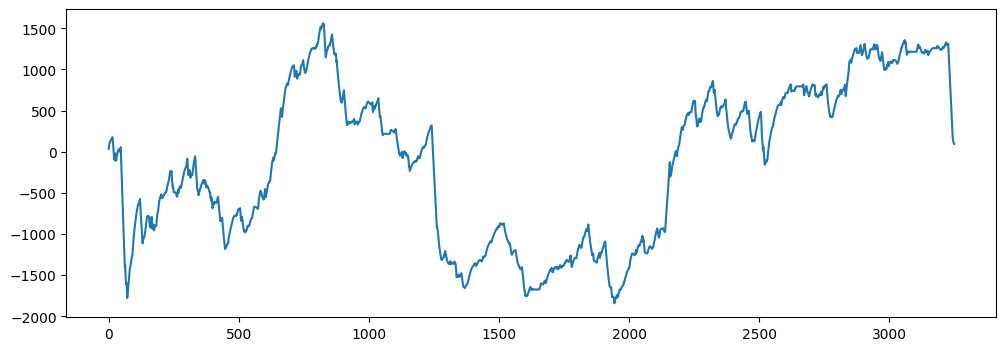

In [17]:
plt.figure(figsize=(12,4))
final_intraday_log['PnL'].cumsum().plot() 